In [1]:
import torch.nn as nn
import torch.tensor as t


In [2]:
import numpy as np, pandas as pd,math


# Broadcasting 
- The way to deal with matrix or more specifically **tensor** operations.
- It means **copying one or more axes** of our **out of shape tensor** such that it is of the **same shape of some other tensor.**
- It is a way to **completely utilise the processing power of your gpu and cpu and a way to AVOID LOOPS.**

- Formal definition is ->
- Broadcasting how numpy treats arrays with different shapes during their operations.
- The smaller arrays are ""**broadcast**" to the dimensions of the larger array so that they have compatible shapes.
- **Broadcating allows us to VECTORIZE ANY ARRAY so that the operations of looping are performed in C and not python, so it makes it faster.**
- Numpy does this without making any copy of the data but **DEALS WITH AS THEM AS THEY ARE LIKE THE GREATER SHAPES.**

- <font size = 3> Note that the **leading axis in DL is rows**</font>

In [139]:
b = np.array([2,5,-9,1])
# Vector or basically a tensor of rank(1).

In [137]:
b < 0 # 0 is called a scalar.

array([False, False,  True, False])

In [5]:
print("If we do b>0 means we are getting an array which has teh result\n of element wise comparisons")

If we do b>0 means we are getting an array which has teh result
 of element wise comparisons


# How are we able to do this?
- Well we are **broadcasting** the **scalar** which is **0** and then comparing element wise with the array **b**

In [27]:
print("Shape of 0 :",np.array([0]).shape)
print("Shape of b :",b.shape)

Shape of 0 : (1,)
Shape of b : (4,)


In [18]:
np.array([0])

array([0])

In [208]:
a = t([[1,2,3],[4,5,6],[7,8,9]]).cuda()

In [209]:
a + 1

tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]], device='cuda:0')

- The above operation just make a **matrix of ones** and adds the ones to each and every element one by one.
- [1,2,3] + [1,1,1]
- [4,5,6] + [1,1,1]
- [7,8,9] + [1,1,1]

In [198]:
a = t([[1,2,3],[4,5,6],[7,8,9]]).cuda()

In [56]:
a.float()

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], device='cuda:0')

In [57]:
a*float(2)

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]], device='cuda:0')

#### Broadcasting a vector to a tensor through example
- The vector **[10,20,30]** is made into ->
- [10,20,30]
- [10,20,30]
- [10,20,30]

## Row wise additions.

In [197]:
c = t([10,20,30]).cuda()

## A useful function in PyTorch is 
- expand_as() , the <b> parameter is the tensor for which we are broadcasting**.

In [145]:
c.expand_as(a) # this is niceeee.

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]], device='cuda:0')

In [60]:
c

tensor([10, 20, 30], device='cuda:0')

In [146]:
a+c # To each row, C is added.

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]], device='cuda:0')

## Column wise addition.
- For doing **column wise addition we need to pass in a MATRIX**

In [170]:
w = t([10,20,30]).cuda()
s = t([[10,20,30],[1,2,3]]).cuda()

# THE None index.
- What **None** does is add a **NEW AXIS AT THE PLACE YOU GIVE IT IN A TENSOR**
- EXAMPLES ...
- Note- <font size = 5>":"</font>can only be used the same amount of times that there are **ACTUAL AXES** in the tensor.
- Eg. if it is a matrix, you can only use <font size = 5>":"</font> two times as there are **Two existing axes**

In [210]:
w[:,None] # This means leave the contents of the first axis as
#it is but add a UNIT AXIS after the contents.

tensor([[10],
        [20],
        [30]], device='cuda:0')

In [215]:
a + w[:,None]
# Adding w as a column

tensor([[11, 12, 13],
        [24, 25, 26],
        [37, 38, 39]], device='cuda:0')

In [232]:
w.shape

torch.Size([3])

In [234]:
k = np.array(w.cpu())
k[:,None].shape

(3, 1)

In [235]:
print(w[None]) # row tensor
print(w[:,None]) # column tensor
w[None] * w[:,None]

tensor([[10, 20, 30]], device='cuda:0')
tensor([[10],
        [20],
        [30]], device='cuda:0')


tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]], device='cuda:0')

In [191]:
(w[:,None,None].shape)

torch.Size([3, 1, 1])

In [187]:
print(*np.matrix(s.cpu())[None,:,:].shape)
print("The above dimensions are 1 row, 2 columns, 3 depth")

1 2 3
The above dimensions are 1 row, 2 columns, 3 depth


In [156]:
a + w[:,None]

tensor([[11, 12, 13],
        [24, 25, 26],
        [37, 38, 39]], device='cuda:0')

# Rules for broadcasting.
- When operating on two arrays or tensors, Numpy / PyTorch comapres their shapes **element wise in their dimensions.**
- It starts with the **trailing dimensions** and goes forward checking.
- What is trailing dimensions?
- If an array is like (3,) and another is (256x256x3)
- So pytorch and numpy compares like ->
- 256 x 256 x **3 <-**
- ......  x ...... **x 3 <-**
- Means that the library starts from back to front, like compare **3 and 3,** then **256 and empty** , then **256 and empty**.
- What are the rules?
    - The rule 1 is that the dimensions must be equal.
    - The rule 2 is that one of the dimensions are empty or 1.
- <font size=4>**Even if one of the dimensions do not match they are not compatible**
- The above given arrays are **compatible according to the given rules**

# Matrix multiplication


In [196]:
import torch as torch
from torch.autograd import Variable

In [195]:
a

tensor([[-4.2072e-01, -1.5304e+00,  5.2927e-01,  5.6044e-01,  1.4821e+00,
         -3.9634e-01,  1.3713e+00,  1.9432e+00, -1.2573e-01, -8.1190e-01],
        [-8.4682e-01,  1.4117e+00, -4.2288e-01, -2.6754e-01, -1.4966e-01,
          2.5317e-01, -2.1441e+00, -1.4753e+00, -3.0366e-01,  2.1197e-02],
        [-9.7100e-01,  3.5143e-01,  5.7135e-02, -1.3533e+00,  2.1559e-01,
          1.1832e+00,  2.0273e-02,  5.1995e-01, -6.6505e-02, -6.8103e-01],
        [ 2.7609e+00, -1.6904e-01,  8.6487e-01, -1.4351e+00,  6.1356e-01,
         -2.5427e-01, -9.6483e-01, -2.0081e+00, -4.5239e-03,  3.3980e-01],
        [ 2.8570e+00, -1.8378e+00,  1.1352e+00, -2.1597e+00, -1.9335e-01,
         -4.0519e-01, -2.5552e-01, -9.4426e-01,  1.0172e+00, -8.7593e-01],
        [ 4.3885e-01,  1.4393e+00,  6.4761e-02,  1.1460e+00, -5.1106e-01,
         -1.6344e+00,  4.4033e-01,  7.0116e-03,  2.1353e+00,  5.7783e-01],
        [ 8.7857e-01, -9.5615e-01,  5.9148e-01,  9.6949e-01,  2.1768e-01,
          8.7535e-01,  1.6069e-0

# Notice
-<font size=5> a * c is the **element wise multiplication of the matrices**</font>

In [194]:
print(a*c)
print("\nWe can also do each row's sum to get the final result\n")
print((a*c).sum(axis=1))

RuntimeError: The size of tensor a (10) must match the size of tensor b (3) at non-singleton dimension 1

# This is the matrix multiplication

- We can either use the **@ operator** as the matrix mutiplication operator or we can also use **torch.matmul()** which also does

In [199]:
a = t([[1,2,3],[4,5,6],[7,8,9]]).cuda()
c = t([10,20,30]).cuda()

In [200]:
torch.matmul(a.float(),c.float()).cuda()

tensor([140., 320., 500.], device='cuda:0')

In [201]:
a = torch.randn(10,10).cuda()

In [202]:
A = np.matrix(a.cpu())

In [203]:
d = torch.randn(10,1).cuda()

In [204]:
#d[:].shape
print(d[None,:].shape)

torch.Size([1, 10, 1])


In [205]:
a @ d

tensor([[ 3.8484],
        [-2.5718],
        [ 2.4284],
        [-1.9162],
        [ 3.4583],
        [-4.7154],
        [-0.0712],
        [ 2.3606],
        [-3.3333],
        [ 1.5689]], device='cuda:0')

In [206]:
try:
    a@d
    print("Matrix multiplication is :")
    print(a @ d)
except:
    print("D can't be expanded as A. Lack of dimensions")
    #print(Variable(d))
    #print(Variable(a))

Matrix multiplication is :
tensor([[ 3.8484],
        [-2.5718],
        [ 2.4284],
        [-1.9162],
        [ 3.4583],
        [-4.7154],
        [-0.0712],
        [ 2.3606],
        [-3.3333],
        [ 1.5689]], device='cuda:0')


# Random image generation

In [237]:
import matplotlib.pyplot as plt

In [264]:
f = torch.randn((3,3))

In [265]:
f

tensor([[-0.6258, -0.5062, -1.2974],
        [-1.6298,  1.2650,  0.1089],
        [ 0.2978, -0.3915, -0.4489]])

In [268]:
f[1][2]

tensor(0.1089)

### New function discovered- tensor.flatten and array.flatten
- Makes a high dimensional array or tensor into a single row tensor or row matrix

In [273]:
f.flatten()

tensor([-0.6258, -0.5062, -1.2974, -1.6298,  1.2650,  0.1089,  0.2978, -0.3915,
        -0.4489])

In [249]:
k = np.array(f)

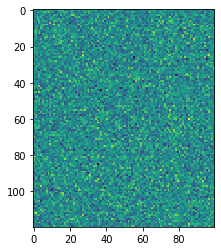

In [270]:
plt.imshow(np.array(k))

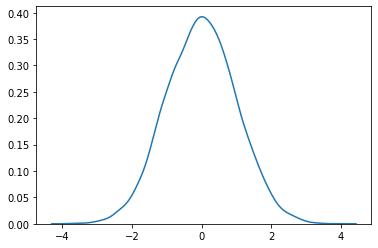

In [272]:
sns.kdeplot(k.flatten())